In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

<h1>Import the dataset</h1>

In [118]:
df = pd.read_csv("Customer Service_Requests_from_2010_to_Present.csv", low_memory = False)
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [120]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [121]:
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

object
object


<h2>Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing</h2>

In [127]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33


In [142]:
df[['Created Date', 'Closed Date', 'Request_Closing_Time']]

,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02
...,...,...,...
300693,2015-03-29 00:33:41,NaT,NaT
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,0 days 02:00:31
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,0 days 03:07:17
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,0 days 04:05:33


In [144]:
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

datetime64[ns]
datetime64[ns]


In [146]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


<h1>python program to drop irrelevant Columns </h1>

In [148]:
drop_irrelevant_columns = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 
    'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 
    'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 
    'School Number', 'School Region', 'School Code', 'School Phone Number', 
    'School Address', 'School City', 'School State', 'School Zip', 
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 
    'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 
    'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 
    'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 
    'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date', 
    'Resolution Action Updated Date', 'Community Board', 'Facility Type', 
    'Location'
]

# Dropping only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in drop_irrelevant_columns if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33


<h2>a python program to remove the NaN missing values</h2>

In [151]:
# Check NaN value in each column
print("NaN values in each column:")
print(df.isna().sum())

#  Check total NaN values in the entire dataset
print("\nTotal NaN values in dataset:")
print(df.isna().sum().sum())

# show NaN value rows
print("\nRows with NaN values:")
print(df[df.isna().any(axis=1)])

NaN values in each column:
Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

Total NaN values in dataset:
22682

Rows with NaN values:
        Unique Key        Created Date         Closed Date Agency  \
33        32306700 2015-12-31 23:18:10 2016-01-02 01:04:00   NYPD   
283       32309451 2015-12-31 17:40:16 2016-01-01 10:59:00   NYPD   
302       32309860 2015-12-31 17:05:30 2016-01-01 08:17:00   NYPD   
313       32308417 2015-12-31 16:48:37 2015-12-31 20:19:11   NYPD   
374       32309343 2015-12-31 15:26:19 2015-12-31 18:58:30   NYPD   
...            ...    

In [153]:
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN,NaT
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33


In [155]:
df = df.dropna()
df

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,0 days 00:38:29
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,0 days 02:00:31
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,0 days 03:07:17
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,0 days 04:05:33


In [157]:
# Check NaN value in each column
print("NaN values in each column:")
print(df.isna().sum())

#  Check total NaN values in the entire dataset
print("\nTotal NaN values in dataset:")
print(df.isna().sum().sum())

# show NaN value rows
print("\nRows with NaN values:")
print(df[df.isna().any(axis=1)])

NaN values in each column:
Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

Total NaN values in dataset:
0

Rows with NaN values:
Empty DataFrame
Columns: [Unique Key, Created Date, Closed Date, Agency, Complaint Type, Descriptor, Location Type, Incident Zip, City, Status, Resolution Description, Borough, Latitude, Longitude, Request_Closing_Time]
Index: []


<h2>a python program to see the unique values from all the columns</h2>

In [160]:
for col in df.columns:
    uniquecolumn = df[col].unique()
    print('-' * 50)
    print('Name of Column:', col)
    print('Total Unique Values:', df[col].nunique()) #count total unique value
    print('Unique Values:', uniquecolumn) 
    print('-' * 50)

--------------------------------------------------
Name of Column: Unique Key
Total Unique Values: 291107
Unique Values: [32310363 32309934 32309159 ... 30283424 30280004 30281825]
--------------------------------------------------
--------------------------------------------------
Name of Column: Created Date
Total Unique Values: 251970
Unique Values: <DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58', '2015-12-31 23:56:30',
 '2015-12-31 23:55:32', '2015-12-31 23:54:05', '2015-12-31 23:53:58',
 '2015-12-31 23:52:58',
 ...
 '2015-03-29 00:42:48', '2015-03-29 00:37:15', '2015-03-29 00:35:28',
 '2015-03-29 00:35:23', '2015-03-29 00:35:04', '2015-03-29 00:34:32',
 '2015-03-29 00:33:28', '2015-03-29 00:33:03', '2015-03-29 00:33:02',
 '2015-03-29 00:33:01']
Length: 251970, dtype: datetime64[ns]
--------------------------------------------------
--------------------------------------------------
Name of Column: 

<h2>a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame</h2>

In [163]:
# Creating temporary numeric Request Closing time
df_stats = df.copy()
df_stats.loc[:, 'Request_Closing_Seconds'] = df_stats['Request_Closing_Time'].dt.total_seconds()

# including it in summary
statistics_summary = pd.DataFrame({
    'Sum': df_stats.sum(numeric_only=True),
    'Mean': df_stats.mean(numeric_only=True),
    'Standard Deviation': df_stats.std(numeric_only=True),
    'Skewness': df_stats.skew(numeric_only=True),
    'Kurtosis': df_stats.kurtosis(numeric_only=True)
})

print(statistics_summary)


                                  Sum          Mean  Standard Deviation  \
Unique Key               9.112108e+12  3.130158e+07       575377.738707   
Incident Zip             3.160833e+09  1.085798e+04          580.280774   
Latitude                 1.185553e+07  4.072568e+01            0.082411   
Longitude               -2.152010e+07 -7.392504e+01            0.078654   
Request_Closing_Seconds  4.515690e+09  1.551213e+04        21825.509089   

                          Skewness    Kurtosis  
Unique Key                0.016898   -1.176593  
Incident Zip             -2.553956   37.827777  
Latitude                  0.123114   -0.734818  
Longitude                -0.312739    1.455600  
Request_Closing_Seconds  14.299525  849.777081  


<h2>a Python program to calculate and show correlation of all variables</h2>

In [166]:
calculate_correlation = df.select_dtypes(include='number').corr()
print(calculate_correlation)

                      Unique Key  Incident Zip  Latitude  Longitude  \
Unique Key              1.000000      0.025492 -0.032613  -0.008621   
Incident Zip            0.025492      1.000000 -0.499081   0.385934   
Latitude               -0.032613     -0.499081  1.000000   0.368819   
Longitude              -0.008621      0.385934  0.368819   1.000000   
Request_Closing_Time    0.053126      0.057182  0.024497   0.109724   

                      Request_Closing_Time  
Unique Key                        0.053126  
Incident Zip                      0.057182  
Latitude                          0.024497  
Longitude                         0.109724  
Request_Closing_Time              1.000000  


[]

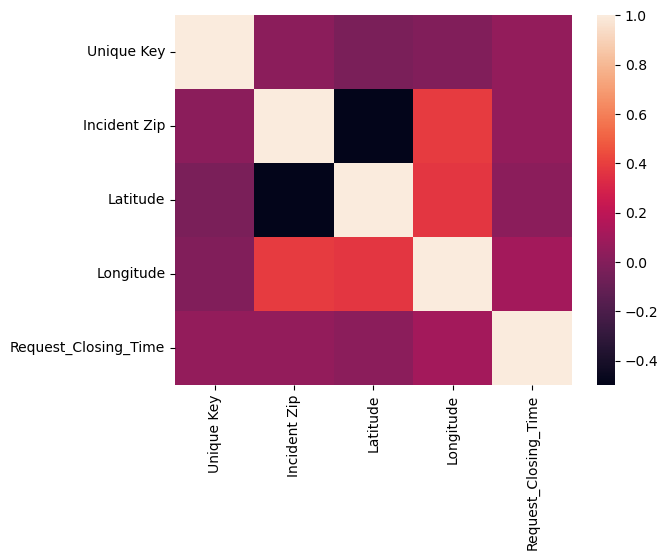

In [168]:
import seaborn as sns
sns.heatmap(calculate_correlation)
plt.plot()



<h1>●	Provide four major insights through visualization that you come up after data mining. </h1>

<h3>1. types of complaints</h3>

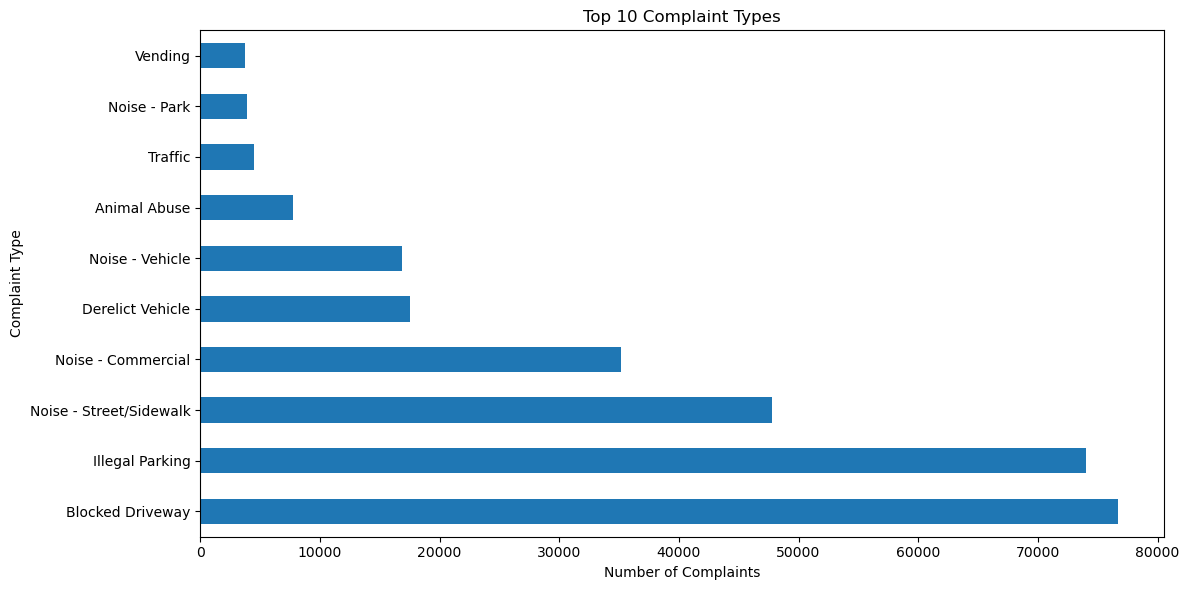

In [172]:
plt.figure(figsize=(12,6))
df['Complaint Type'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Complaint Types")
plt.xlabel("Number of Complaints")
plt.ylabel("Complaint Type")
plt.tight_layout()
plt.show()

<h3>2. Complaints by Borough</h3>

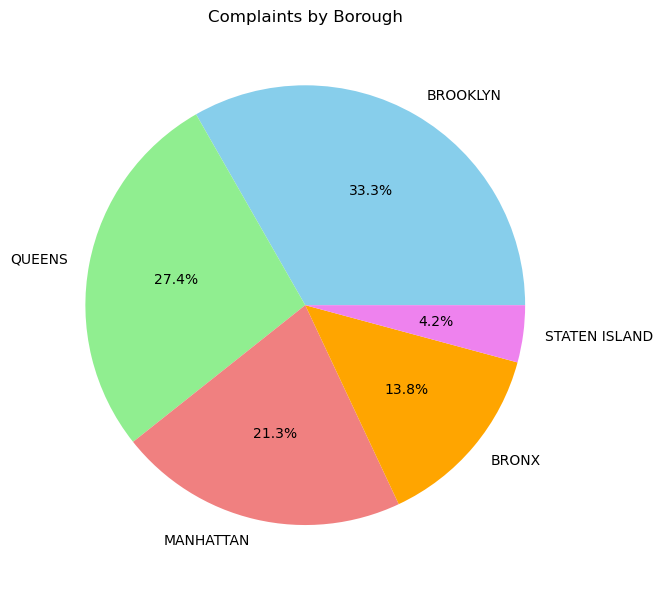

In [175]:
# Count complaints per borough
borough_counts = df['Borough'].value_counts()
 #pie chart
plt.figure(figsize=(10, 6))
plt.pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'violet'])
plt.title('Complaints by Borough')
plt.tight_layout()
plt.show()

<h3>3. Monthly Trend of complaints</h3>

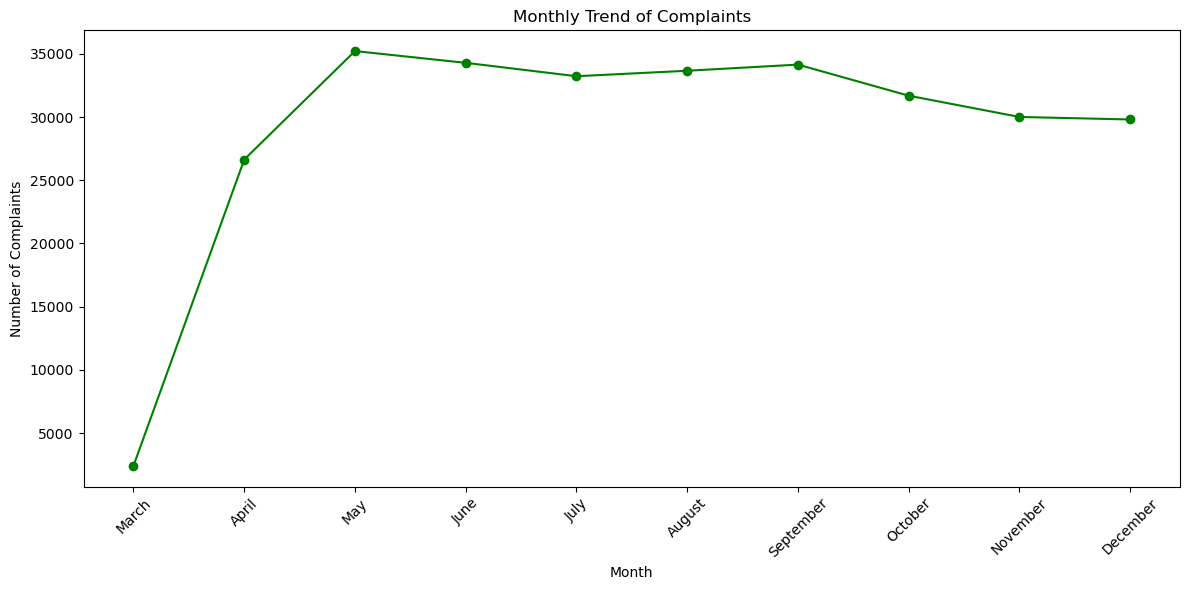

In [206]:

df = df.copy()

# Create 'Month' column
df['Month'] = df['Created Date'].dt.month_name()

# Count complaints per month and sorting them in calendar order
monthly_counts = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).dropna()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Trend of Complaints')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>4. Most Common Complain in each borough</h3>

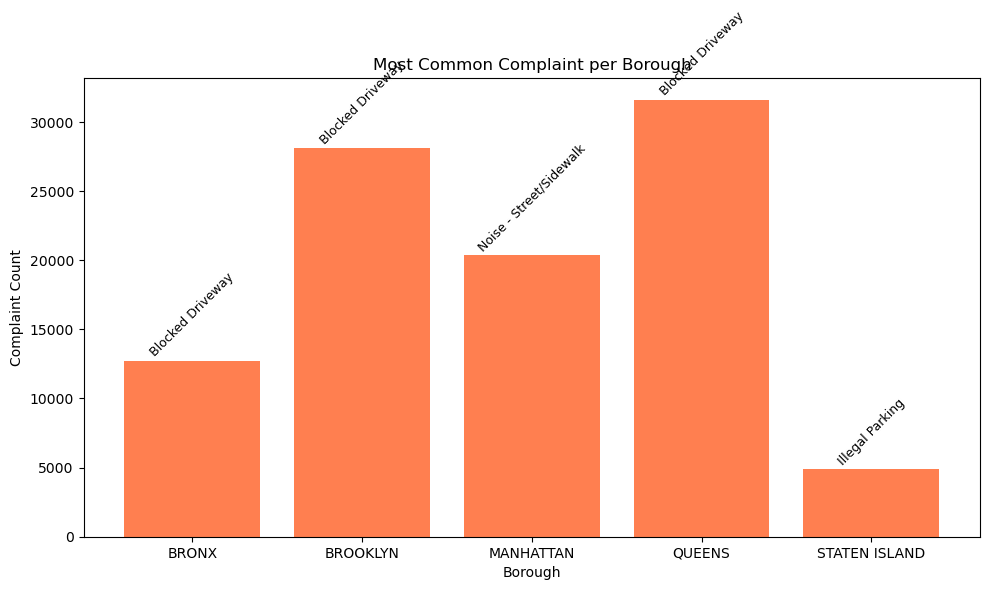

In [181]:

# most frequent complaint type in each borough
top_complaints = df.groupby('Borough')['Complaint Type'].agg(pd.Series.mode)

# Count how many times each top complaint occurred
counts = df.groupby('Borough')['Complaint Type'].value_counts().groupby(level=0).first()

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color='coral')

# Add complaint type labels above bars
for bar, complaint in zip(bars, top_complaints):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             complaint, ha='center', va='bottom', fontsize=9, rotation=45)

# Add titles and labels
plt.title('Most Common Complaint per Borough')
plt.xlabel('Borough')
plt.ylabel('Complaint Count')
plt.tight_layout()
plt.show()

<h3>●	Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. Illustrate it through graph as well.         </h3>

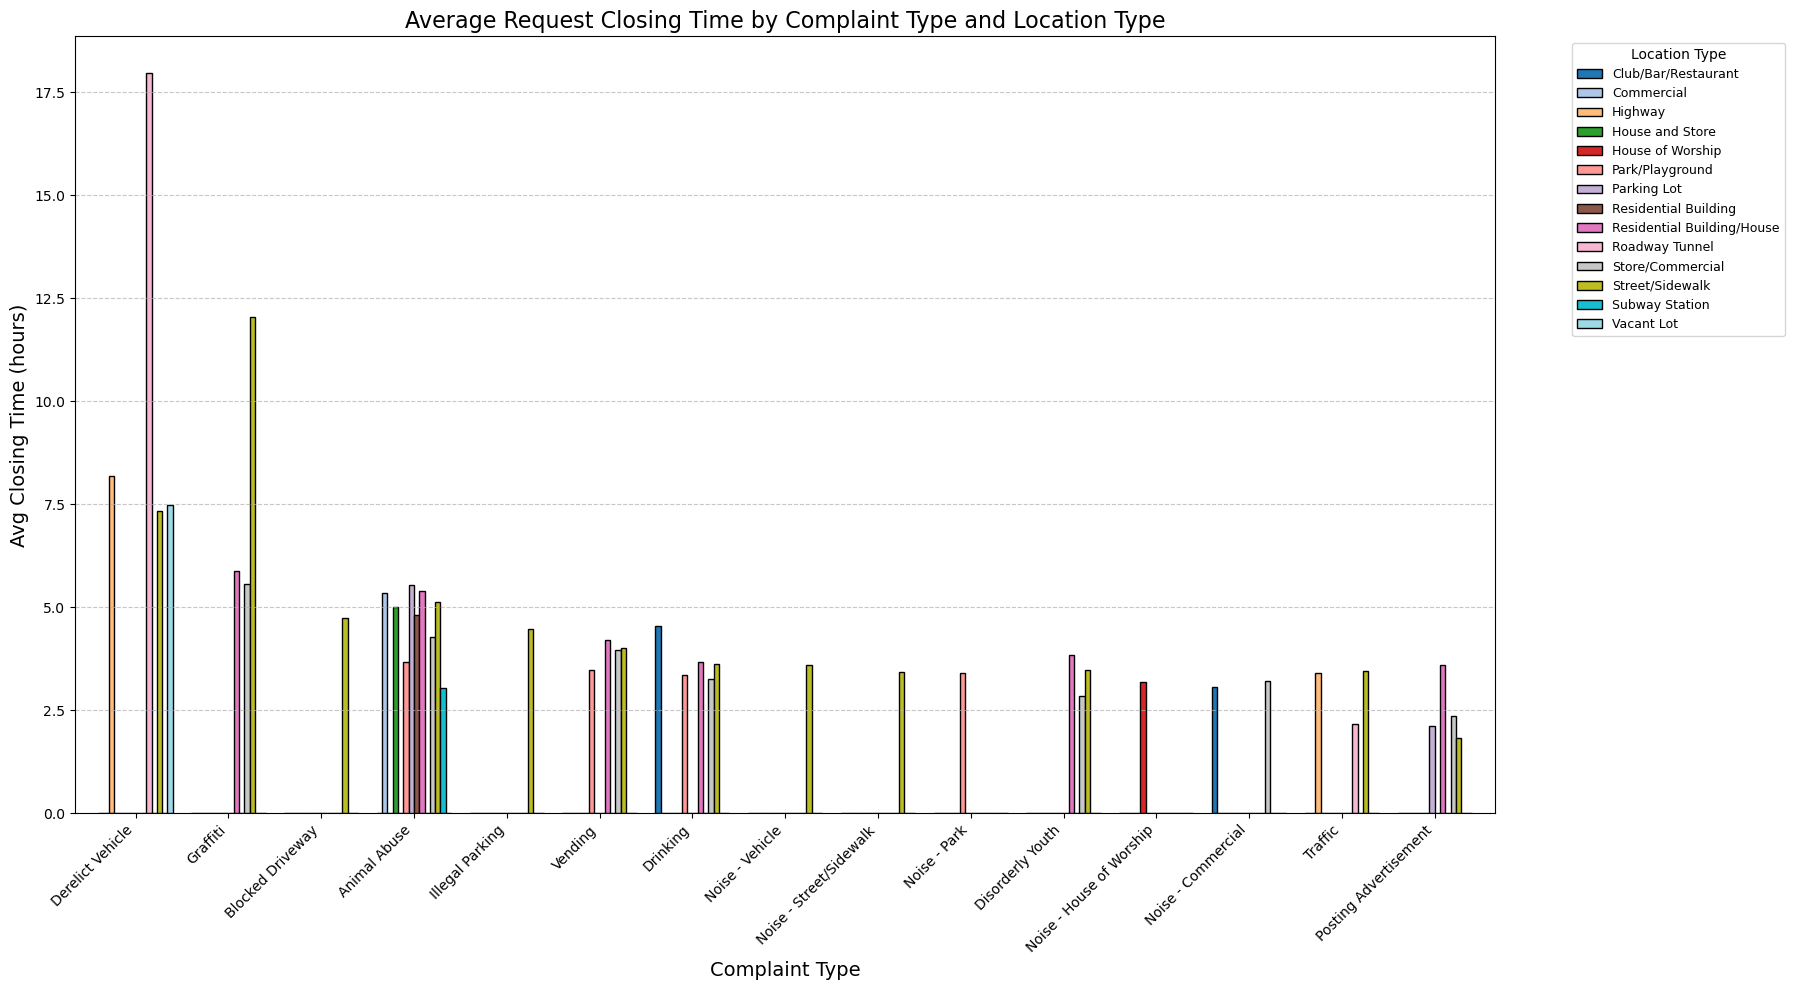

In [184]:

plt.figure(figsize=(20, 10))  # Wider figure
avg_closing_time.plot(
    kind='bar',
    ax=plt.gca(),
    colormap='tab20',
    edgecolor='black',
    width=0.8
)

plt.title("Average Request Closing Time by Complaint Type and Location Type", fontsize=16)
plt.xlabel("Complaint Type", fontsize=14)
plt.ylabel("Avg Closing Time (hours)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Better rotation
plt.yticks(fontsize=10)
plt.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)  # Move legend outside
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(right=0.75)  # Make space for legend
plt.show()


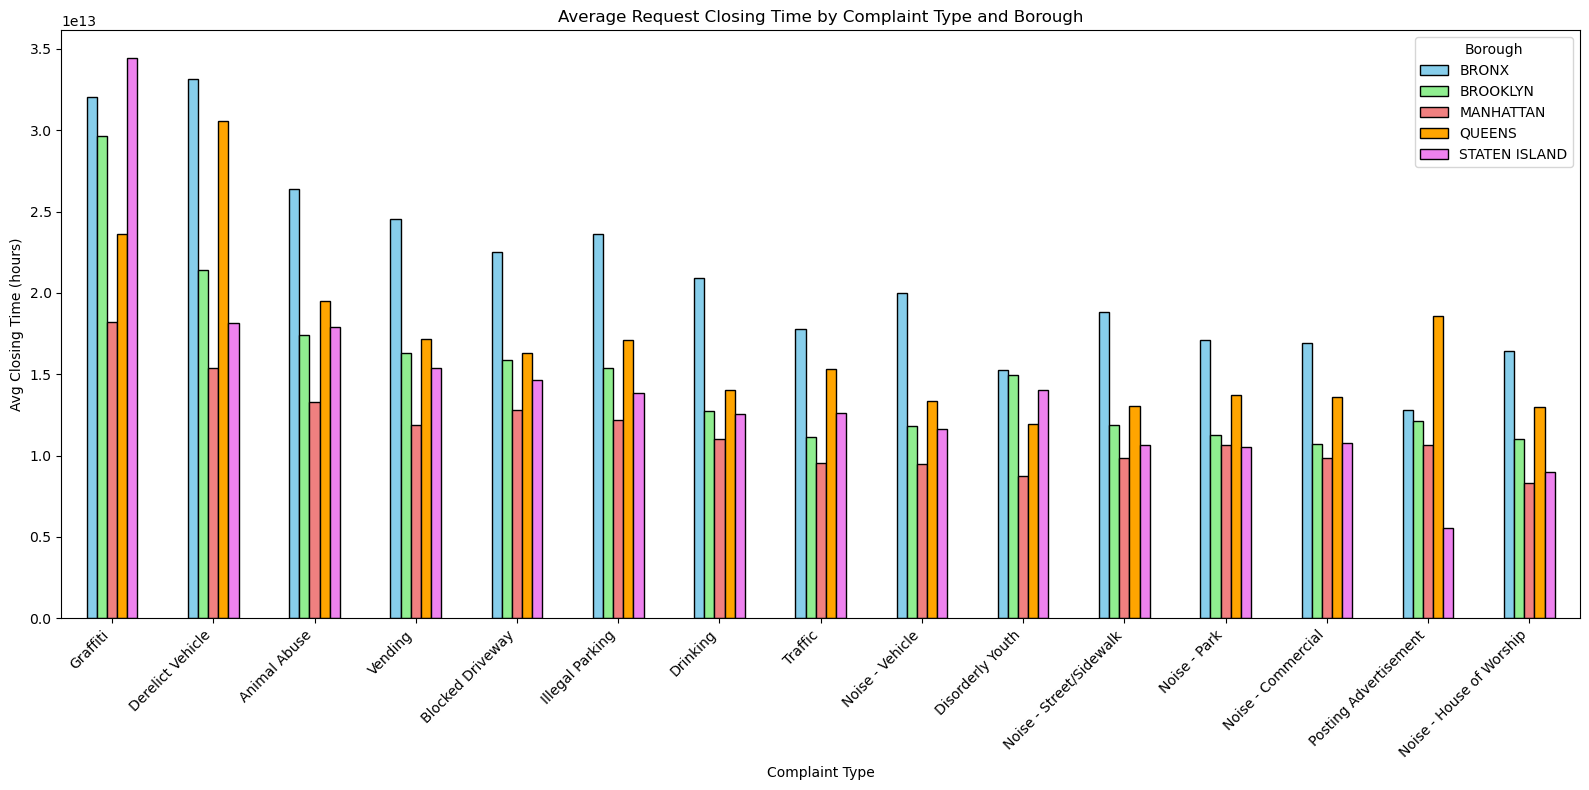

In [200]:
avg_closing_time = df.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().unstack()
# Sort by the overall mean closing time across boroughs for better visualization
avg_closing_time['Mean'] = avg_closing_time.mean(axis=1)
avg_closing_time = avg_closing_time.sort_values('Mean', ascending=False).drop('Mean', axis=1)
# Plot multiseries column chart
plt.figure(figsize=(16, 8))
avg_closing_time.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'violet'], edgecolor='black')
plt.title("Average Request Closing Time by Complaint Type and Borough")
plt.xlabel("Complaint Type")
plt.ylabel("Avg Closing Time (hours)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

<h2>●	Test 1: Whether the average response time across complaint types is similar or not</h2>

In [196]:
# Convert request closing time to hours (with .loc to avoid the warning)
df.loc[:, 'Request_Closing_Hours'] = df['Request_Closing_Time'].dt.total_seconds() / 3600

# Group by Complaint Type
groups = [group['Request_Closing_Hours'].dropna().values for name, group in df.groupby('Complaint Type')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Reject Null Hypothesis — Average response times differ across complaint types.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis — Average response times are similar.")


F-statistic: 578.9120337398356
p-value: 0.0
Conclusion: Reject Null Hypothesis — Average response times differ across complaint types.


<h2>●	Test 2: Whether the type of complaint or service requested and location are related.</h2>

In [194]:
# Create a contingency table (Complaint Type vs Location)
contingency_table = pd.crosstab(df['Complaint Type'], df['City'])  

#  Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

#  Output results
print("Chi-Square Statistic:", round(chi2_stat, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p_value, 4))

#: Interpretation
if p_value < 0.05:
    print("Conclusion: Reject Null Hypothesis — Complaint type and location are related.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis — Complaint type and location are not related.")


Chi-Square Statistic: 105247.14
Degrees of Freedom: 728
p-value: 0.0
Conclusion: Reject Null Hypothesis — Complaint type and location are related.
